In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("abalone.data")
df.head()

,Sex,Length,Diameter,Height,WWeight,SWeight,VWeight,ShWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df.describe()

,Length,Diameter,Height,WWeight,SWeight,VWeight,ShWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


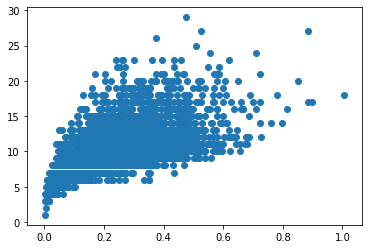

In [3]:
plt.scatter(df[df.columns[7]],df[df.columns[-1]])
plt.show()

In [4]:
df_num = df.replace("M",0).replace("F",1).replace("I",2)
df_num.head()

,Sex,Length,Diameter,Height,WWeight,SWeight,VWeight,ShWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
def df2np(df):
    """Convert pandas dataframe to numpy X,y"""
    X = df.values[:,:-1]
    y = df.values[:,-1]
    return X,y

X,y = df2np(df_num)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((3132, 8), (1045, 8))

In [7]:
from sklearn.metrics import r2_score

w = np.linalg.pinv(X_train).dot(y_train)
yhat = X_test.dot(w)

score_train = r2_score(X_train.dot(w),y_train)
score_test = r2_score(yhat,y_test)

score_train,score_test

(0.26142147814339756, 0.24399088583152917)

In [8]:
w

array([  0.14951032,   8.39272163,   6.32243603,  22.50946409,
        23.65709735, -32.38646556,  -8.95757002,   5.0986671 ])

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)


w = np.linalg.pinv(X_train_poly).dot(y_train)
yhat = X_test_poly.dot(w)

poly_score_train = r2_score(X_train_poly.dot(w),y_train)
poly_score_test = r2_score(yhat,y_test)

poly_score_train,poly_score_test

(0.2888095253732391, 0.29033602754394916)

In [10]:
df = pd.read_csv("abalone.data")

df = pd.concat([pd.get_dummies(df['Sex'], prefix='Sex',drop_first=True),df],axis=1)

# now drop the original 'Sex' column (you don't need it anymore)
df.drop(['Sex'],axis=1, inplace=True)



In [11]:
df.head()

,Sex_I,Sex_M,Length,Diameter,Height,WWeight,SWeight,VWeight,ShWeight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
X,y = df2np(df)
X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
w = np.linalg.pinv(X_train).dot(y_train)
yhat = X_test.dot(w)

score_train = r2_score(X_train.dot(w),y_train)
score_test = r2_score(yhat,y_test)

score_train,score_test

(0.2184934188053277, 0.37305026894934923)

In [14]:
poly2 = PolynomialFeatures(2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)



w = np.linalg.pinv(X_train_poly).dot(y_train)
yhat = X_test_poly.dot(w)

poly_score_train = r2_score(X_train_poly.dot(w),y_train)
poly_score_test = r2_score(yhat,y_test)

poly_score_train,poly_score_test

(0.30889246155126693, 0.41358737052897887)